#MNIST

let's see how others have done this with SVM, following this: https://www.kaggle.com/joseduc/digit-recognizer/training-data-to-png

In [2]:
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
import pandas as pd
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.svm import SVC 


In [3]:
df = pd.read_csv('train.csv', header = 0)
df_test = pd.read_csv('test.csv',header = 0)

print("Training set has {0[0]} rows and {0[1]} columns".format(df.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(df_test.shape))

Training set has 42000 rows and 785 columns
Test set has 28000 rows and 784 columns


In [6]:
data = df.values
data_test = df_test.values
x = data[:,1::]
x_test = data_test
y = data[:,0]

# normalize data 
x_mean = np.mean(x)
x_std = np.std(x)
x = (x - x_mean)/x_std
x_test = (x_test - x_mean) / x_std

In [7]:
# decomposition with PCA
num_components = 25
pca = PCA(n_components = num_components, whiten = True)
pca.fit(x)
x = pca.transform(x)
x_test = pca.transform(x_test)


In [9]:
svc = SVC(kernel='rbf')
svc.fit(x,y)

output = svc.predict(x_test)
output = output.astype(int)
imageId = np.arange(1,28001)
submission = pd.DataFrame({"ImageId":imageId,"label":output})

In [13]:
submission.head(5)

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


and can we check these images?

In [42]:
from PIL import Image

im_test = pd.read_csv('test.csv')
count = -1
for ind, row in im_test.iloc[0:5].iterrows():
    count += 1
    arr = np.array(row[1:], dtype=np.uint8)
    arr.resize((28, 28))
    im = Image.fromarray(arr)
    im.save("%s.png" % count)

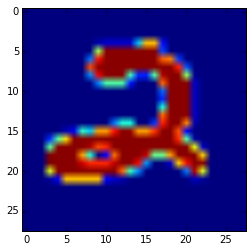

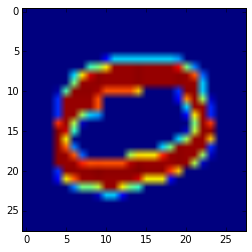

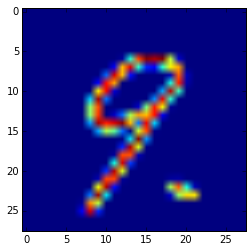

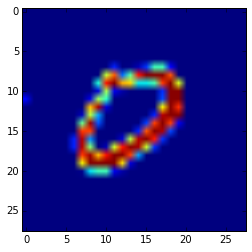

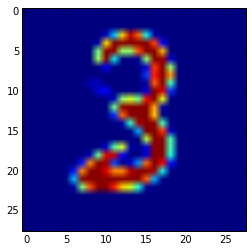

In [46]:
from IPython.display import Image as Im
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(5):
    image = mpimg.imread("%s.png" %i)
    plt.imshow(image)
    plt.show()

4/5 is pretty okay. now let's dive into neural nets

much of this is following daniel nouri here: http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/

In [53]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 784),  # 28x28 input pixels per batch
    hidden_num_units=10,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=10,  # 10 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=5,  # we want to train this many epochs
    verbose=1,
    )

data = df.values
data_test = df_test.values
X= data[:,1::]
y = data[:,0]

nn_X, nn_y = X,y # we already computed these above
net1.fit(nn_X, nn_y)

  DenseLayer        	(None, 10)          	produces      10 outputs
  DenseLayer        	(None, 10)          	produces      10 outputs
  InputLayer        	(None, 784)         	produces     784 outputs


TypeError: cost must be a scalar.

ugh can't get around this error...